# seaborn - 기본 그래프

matplotlib을 기반으로 하는 python 데이터 시각화 라이브러리로, 
matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가하였음

주요 파라미터

파라미터	설명
- dataㅤ	데이터 구조 입력. 일반적으로 데이터프레임 객체
- x, yㅤ	x, y축의 값을 지정하는 변수
- data를 설정하지 않은 경우 리스트 등의 연속형 변수
- data를 설정한 경우 데이터프레임의 컬럼이름
- hue	데이터를 구분하기 위한 그룹화 변수(범주형 변수)
- data를 설정한 경우 데이터프레임의 컬럼이름
- sizeㅤ	너비가 다른 선을 생성하는 그룹화 변수 (마커의 경우, 마커의 크기가 다르게 나타남)
- styleㅤ	다른 스타일의 마커 또는 선을 생성하는 그룹화 변수
- paletteㅤ	색상 체계 선택

In [2]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

In [3]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

1. 선그래프

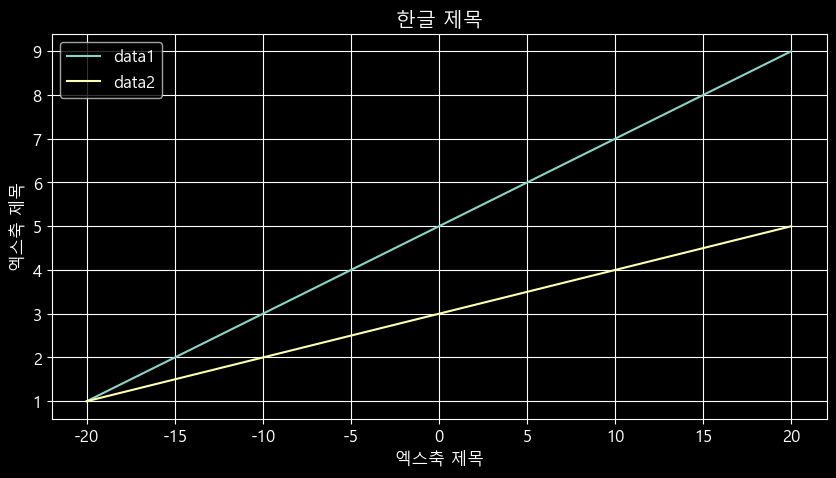

In [4]:
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.lineplot(x=[-20,-10,0,10,20], y=[1,3,5,7,9], label='data1')
sb.lineplot(x=[-20,-10,0,10,20], y=[1,2,3,4,5], label='data2')

# 그 밖의 옵션은 matplotlib과 동일
plt.title('한글 제목')
plt.xlabel('엑스축 제목')
plt.ylabel('엑스축 제목')
plt.grid()
plt.legend()
plt.show()
plt.close()

2. 세로 막대 그래프

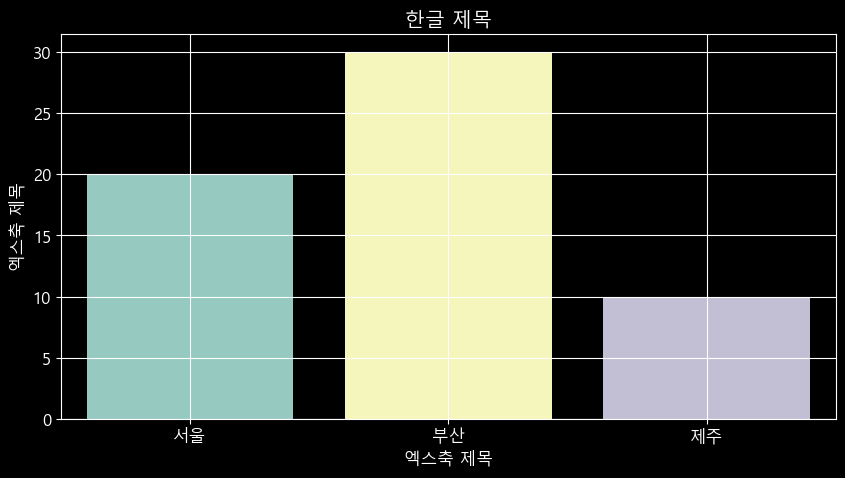

In [7]:
x = ['서울','부산','제주']
y = [20,30,10]

sb.barplot(x=x,y=y)

# 그 밖의 옵션은 matplotlib과 동일
plt.title('한글 제목')
plt.xlabel('엑스축 제목')
plt.ylabel('엑스축 제목')
plt.grid()
plt.show()
plt.close()

3. 가로 막대 그래프

기본제공 파레트.
> deep, muted, pastel, bright, dark, colorblind, Spectral

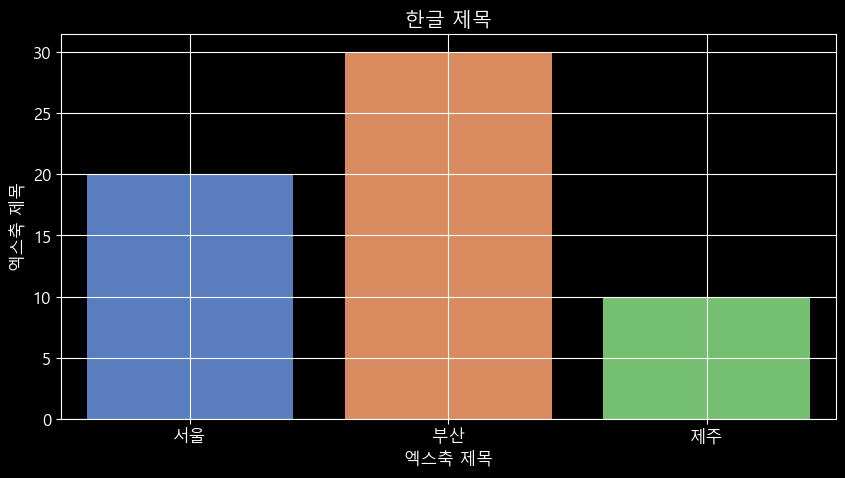

In [8]:
x = ['서울','부산','제주']
y = [20,30,10]

sb.barplot(x=x,y=y,label='data',palette='muted')

# 그 밖의 옵션은 matplotlib과 동일
plt.title('한글 제목')
plt.xlabel('엑스축 제목')
plt.ylabel('엑스축 제목')
plt.grid()
plt.show()
plt.close()

산점도 그래프

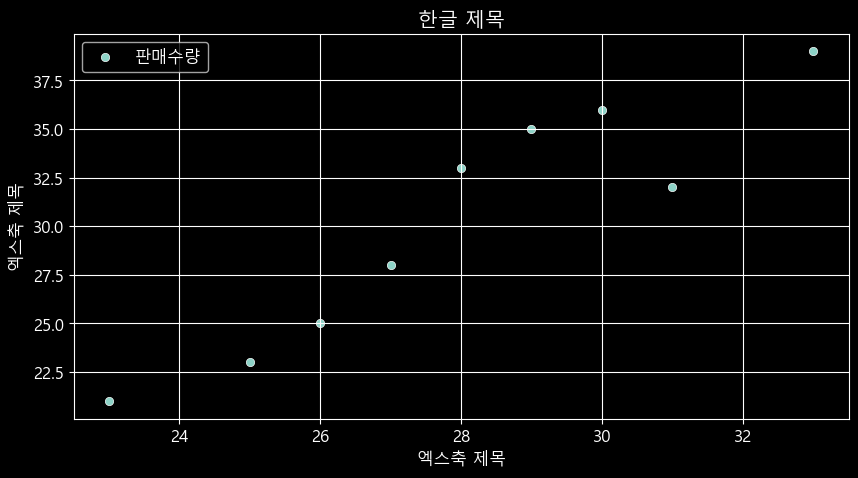

In [9]:
# 온도와 아이스크림 판매 수량
tmp = [ 23, 25, 26, 27, 28, 29, 30, 31, 33 ]
qty = [ 21, 23, 25, 28, 33, 35, 36, 32, 39 ]

sb.scatterplot(x=tmp,y=qty,label='판매수량')

# 그 밖의 옵션은 matplotlib과 동일
plt.title('한글 제목')
plt.xlabel('엑스축 제목')
plt.ylabel('엑스축 제목')
plt.grid()
plt.show()
plt.close()

데이터프레임을 통한 그래프

In [10]:
df = read_excel("https://data.hossam.kr/D01/traffic_acc_year.xlsx", index_col="년도")
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


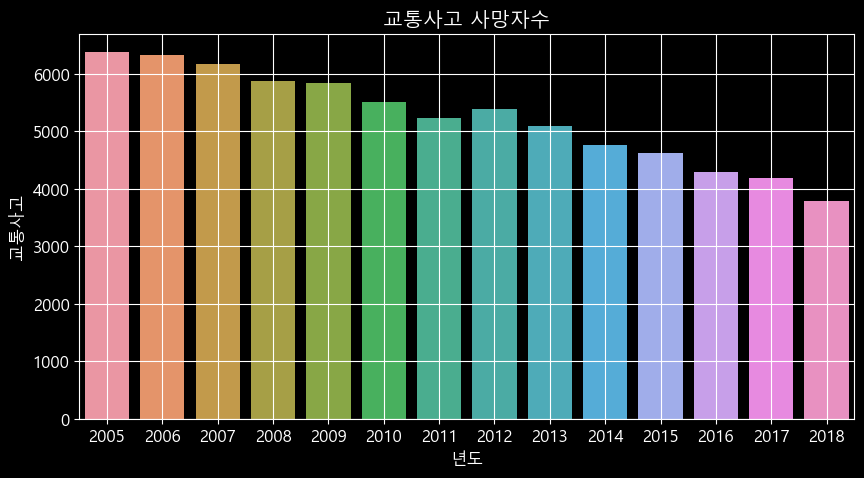

In [11]:
# 막대 그래프
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용가능)
sb.barplot(data=df,x=df.index,y='사망자수')

plt.title('교통사고 사망자수')
plt.xlabel('년도')
plt.ylabel('교통사고')
plt.grid()
plt.show()
plt.close()


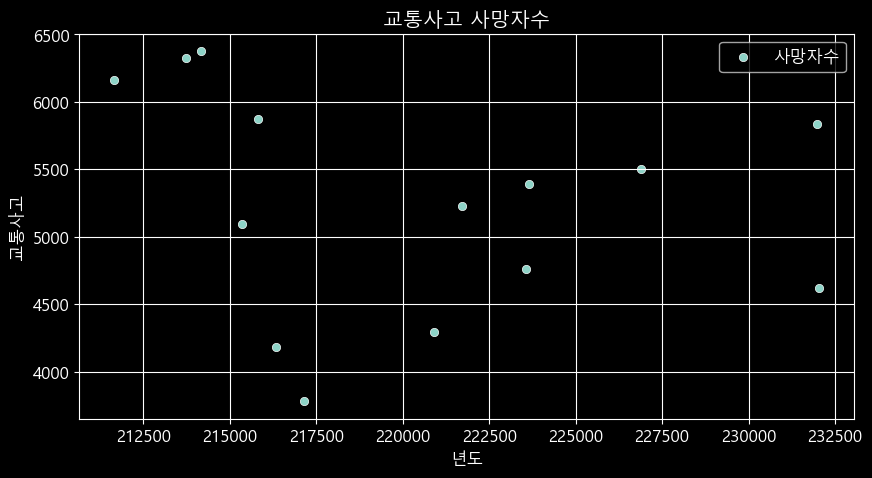

In [13]:
# 산점도 그래프
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용가능)
sb.scatterplot(data=df,x='발생건수',y='사망자수',label='사망자수')

plt.title('교통사고 사망자수')
plt.xlabel('년도')
plt.ylabel('교통사고')
plt.legend()
plt.grid()
plt.show()
plt.close()


##### 추세선을 포함한 산점도 그래프

추세선 주변에 보이는 구간은 95% 신뢰구간임
fit_reg=False를 추가하면 추세선이 표시되지 않게 되어 scatterplot 메서드와 동일한 결과를 보여준다(기본값=True)
ci 파라미터는 신뢰수준을 설정하며 기본값은 95이다.
line_kws 파라미터는 선의 색상, scatter_kws는 점의 색상

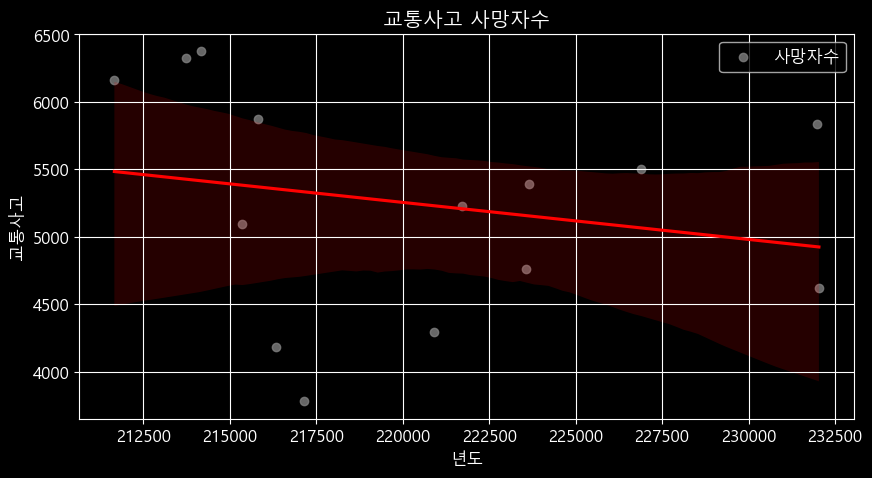

In [14]:
# 추세선을 함께 보여주는 산점도 그래프 그리기

sb.regplot(data=df,x='발생건수',y='사망자수',label='사망자수',line_kws={'color':'red'},scatter_kws={'color':'grey'})

plt.title('교통사고 사망자수')
plt.xlabel('년도')
plt.ylabel('교통사고')
plt.legend()
plt.grid()
plt.show()
plt.close()


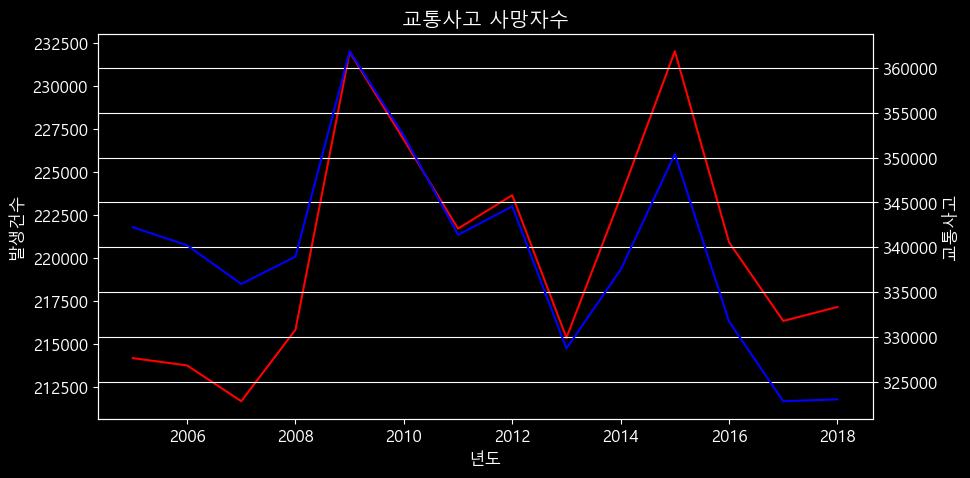

In [18]:
# 서브 플롯에 기반한 선 그래프
# 서브플롯을 사용하지 않을 경우 sb.lineplot()함수에서 ax파라미터를 제거한다.

fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()

# 그래프 그리기
sb.lineplot(data=df, x=df.index, y='발생건수',color='red',ax=ax1)
sb.lineplot(data=df, x=df.index, y='부상자수',color='blue',ax=ax2)

plt.title('교통사고 사망자수')
plt.xlabel('년도')
plt.ylabel('교통사고')
plt.grid()
plt.show()
plt.close()
